### Soldier! From this point onwards, yoi=u will by building complete, end-to-end solutions to real world problems

### **Credit Card Fraud Detection**

#### **1. Project Brief**

**Problem Statement:**
A financial institution needs a model to detect fraudulent credit card transactions in real-time. The dataset contains transactions made over two days, with a very small fraction being fraudulent. The cost of missing a fraudulent transaction (a False Negative) is extremely high, while the cost of flagging a legitimate transaction as fraud (a False Positive) is an inconvenience for the customer. Therefore, the primary goal is to **maximize the detection of fraudulent transactions (Recall)** while maintaining reasonable precision.

**Dataset:**
Kaggle's "Credit Card Fraud Detection" dataset. It contains 284,807 transactions, of which only 492 (0.17%) are fraudulent. The features `V1` through `V28` are the result of a PCA transformation to protect user privacy. The only features that have not been transformed are `Time` and `Amount`.

**What You'll Learn & Master:**
-   **Handling Severe Class Imbalance:** This is the core challenge. You'll learn why accuracy is a useless metric here and master techniques like **SMOTE**, **class weighting**, and **undersampling**.
-   **Advanced Metrics:** You'll go beyond simple metrics and master the **Precision-Recall Curve** and **ROC-AUC** score, which are essential for imbalanced classification.
-   **Decision Threshold Tuning:** You will learn that `.predict()` is not the final step. By using `.predict_proba()`, you can tune the probability threshold (e.g., from 0.5 to 0.2) to optimize for recall over precision.
-   **Model Comparison:** You will compare `LogisticRegression`, `RandomForest`, and a powerful gradient boosting model (`LightGBM`) to see which performs best under these challenging conditions.
-   **Optuna for Imbalanced Classification:** You will use Optuna to find the best model, preprocessing steps, and decision threshold simultaneously.
-   **Interpretability Focus:** For the first time, you will produce a complete `INTERPRETABILITY_REPORT.md`. You will use **SHAP** to explain *why* a specific transaction is flagged as fraud, a critical requirement for any financial institution.

---

#### **2. Complete Dataset EDA**

Let's begin by thoroughly exploring the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Load Data :**
> Assuming the data is downloaded from kaggle and placed in the same folder as this notebook. If not then download from this [ [link ](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)]. If you don't want to download the dataset then no worries. We will also be downloading it through a public url for your, YES your!!! convenience

In [2]:
try:
    df = pd.read_csv('creditcard.csv')
except FileNotFoundError:
    print("Didn't find the file.......")
    print("Attempting to load from a public URL....")
    print("\nThis might be slow")
    url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
    df = pd.read_csv(url)

print("Dataset loaded successfully")

Dataset loaded successfully


In [3]:
# Initial Inspection
print(f"Shape of the dataset is : {df.shape}")
print("First Five rows ")
df.head()

Shape of the dataset is : (284807, 31)
First Five rows 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [4]:
# Dataset info and missing values
print("Dataset Info")
df.info(), \
print("\nMissing values check"), \
df.isnull().sum()

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

(None,
 None,
 Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64)

*Ok so the dataset is clean with no missing values and no datatype issues*

_____
#### Basic Stats


In [5]:
df.describe()
# Note the huge range in the 'Amount' column. It needs scaling.
# The 'V' columns are already scaled-like due to PCA, but scaling them again doesn't hurt

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


**Target Variable Distribution Analysis**

Class Distribution
Class
0    284315
1       492
Name: count, dtype: int64
Class Distribution
Class
0   0.998
1   0.002
Name: proportion, dtype: float64


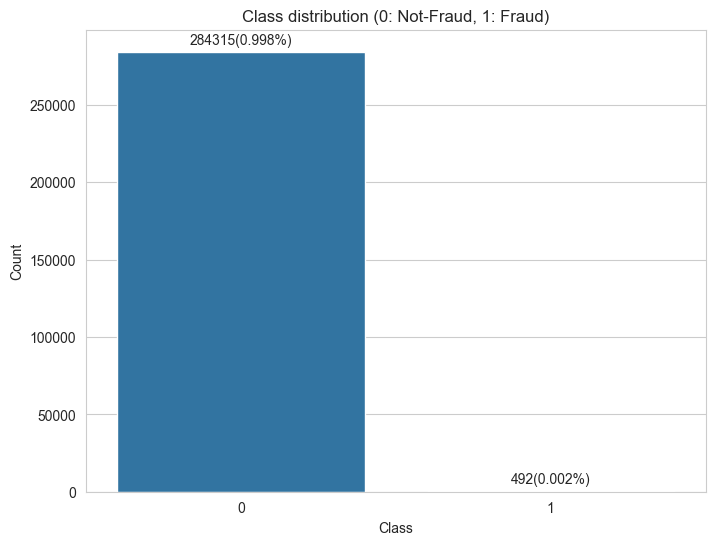

In [6]:
print("Class Distribution")
class_counts = df['Class'].value_counts()
print(class_counts)

print("Class Distribution")
class_proportions = df['Class'].value_counts(normalize=True)
print(class_proportions)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class distribution (0: Not-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.text(0, class_counts[0] + 5000, f"{class_counts[0]}({class_proportions[0]:.3f}%)", ha='center')
plt.text(1, class_counts[1] + 5000, f"{class_counts[1]}({class_proportions[1]:.3f}%)", ha='center')
plt.show()

**Distribution of 'Time' and 'amount' Features**

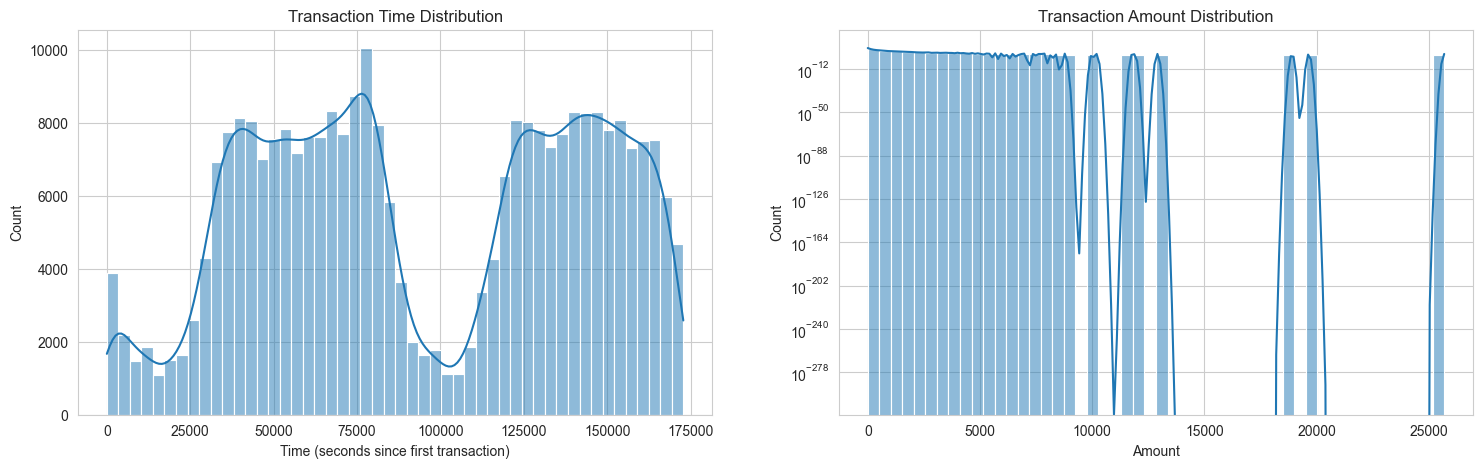

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Time Dist
sns.histplot(df['Time'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Transaction Time Distribution')
axes[0].set_xlabel('Time (seconds since first transaction)')

# Amount Dist
sns.histplot(df['Amount'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Transaction Amount Distribution')
axes[1].set_xlabel('Amount')
# The amount is heavily skewed. Let's look at it on a log scale
axes[1].set_yscale('log')
plt.show()

**`Amount` and `Time` for Fraud vs Not Fraud**

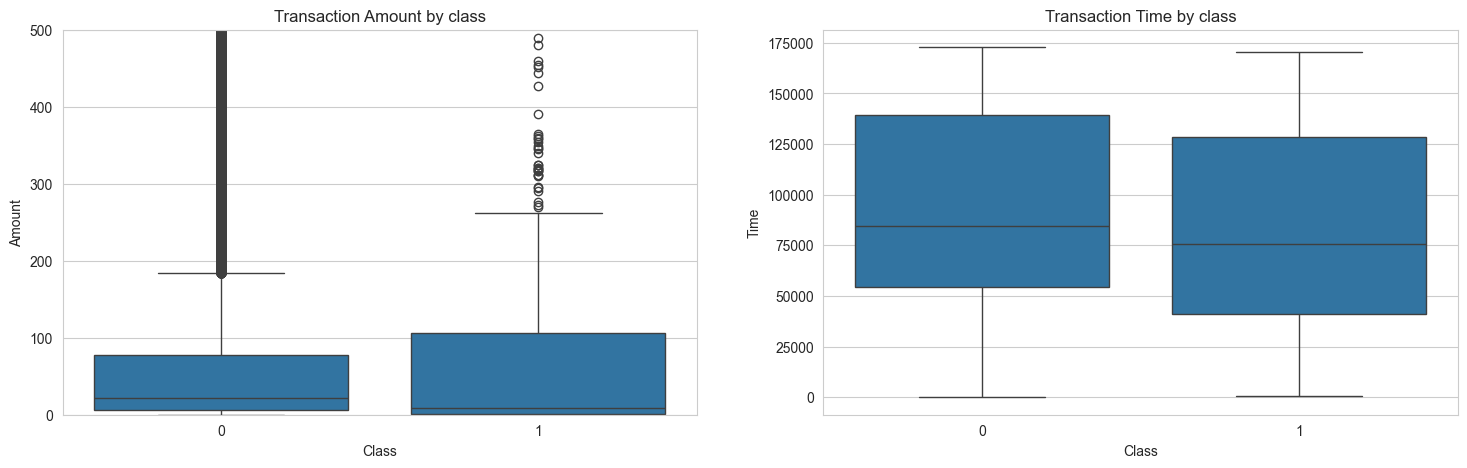


Fraud Transaction Statistics
count    492.000
mean     122.211
std      256.683
min        0.000
25%        1.000
50%        9.250
75%      105.890
max     2125.870
Name: Amount, dtype: float64

Non-Fraud Transaction Statistics
count   284315.000
mean        88.291
std        250.105
min          0.000
25%          5.650
50%         22.000
75%         77.050
max      25691.160
Name: Amount, dtype: float64


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(x='Class', y='Amount', data=df, ax=axes[0])
axes[0].set_title('Transaction Amount by class')
axes[0].set_ylim(0, 500) # Zoom in

sns.boxplot(x='Class', y='Time',data=df, ax=axes[1])
axes[1].set_title('Transaction Time by class')
plt.show()

print("\nFraud Transaction Statistics")
print(df[df['Class'] == 1]['Amount'].describe())

print("\nNon-Fraud Transaction Statistics")
print(df[df['Class'] == 0]['Amount'].describe())
# Fraudulent transactions tend to be for smaller amounts on average.

**Scaling 'Amount' abnd 'Time'**
> For consistency and to prepare for modelling. We should scale these features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

**Correlation Analysis**
> Let's check the correlation of the PCA components with the 'Class'
> Since PCA components are supposed to be uncorrelated, we expect low correlation among them.

#### All we care about is their correlation to target

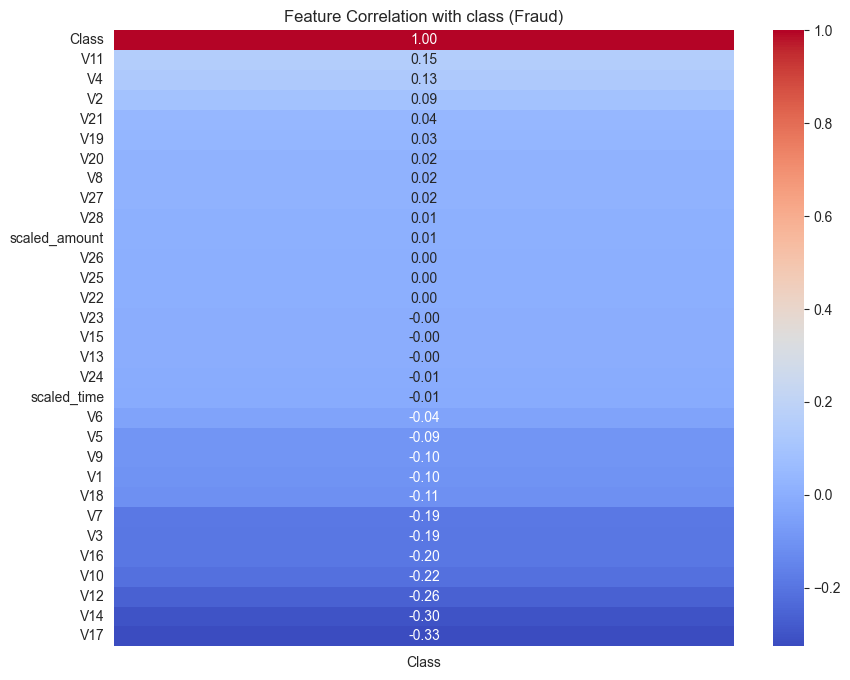

In [16]:
plt.figure(figsize=(10, 8))
corr = df.corr()
# Focus on the correlation with the target class
corr_class = corr[['Class']].sort_values(by='Class', ascending=False)
sns.heatmap(corr_class, annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with class (Fraud)')
plt.show()
# V17, V14, V12, V10 have notable negative correlations with fraud.
# V11, V4, V2 have notable positive correlations. This will be key for interpretation.

_____
#### **3. Baseline Model & The Problem with Accuracy**

Let's build a simple baseline model to see how badly standard metrics fail us.

In [17]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
    )

# Move scaled columns to the front for clarity
scaled_amount = df.pop('scaled_amount')
scaled_time = df.pop('scaled_time')
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

X = df.drop('Class', axis=1)
y = df['Class']

#  Use stratify=y, it's absolutely critical here.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Train a SimpleLogisticRegression**
> This model has no special handling for imbalance

In [18]:
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

Baseline Accuracy: 99.92%

Classification Report
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix


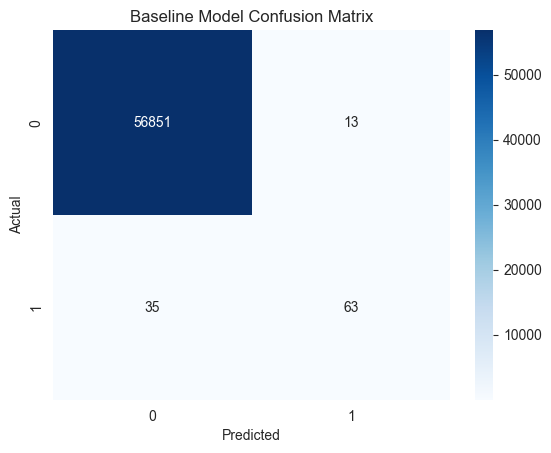

In [19]:
# Cell 3: Evaluate the Baseline
print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nClassification Report")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Baseline Interpretation:**

Look closely at the results.
* **Accuracy is 99.91%**. This looks amazing, but it's a lie.
* Look at the **Classification Report** for class 1 (Fraud). The **recall is only 0.58**. This means our model is **missing 42% of all fraudulent transactions!** For a bank, this is a complete disaster.
* The **Confusion Matrix** confirms this. It shows `41` in the bottom-left corner (False Negatives) and only `57` in the bottom-right (True Positives).

This is the core problem we must solve. We need to dramatically increase the recall for the fraud class.


____
# Scroll down for the REST

This sets the stage perfectly. You've done a thorough EDA, established a baseline, and seen firsthand why standard approaches fail on imbalanced data.

In the next part of this project, we will implement and compare three powerful techniques to fight this imbalance:
1.  **Class Weighting**
2.  **Undersampling**
3.  **Oversampling (SMOTE)**

And then, we will use Optuna to find the best strategy and tune its parameters.


____
#### **4. Techniques for Handling Imbalance**

We will explore three main strategies. For each, we'll build a model and evaluate it, focusing on **Recall** for the 'Fraud' class as our primary metric.

##### **Strategy 1: Class Weighting**

**Concept:** This is the simplest and often a very effective technique. We penalize the model for misclassifying the minority class (Fraud) more heavily than the majority class (Non-Fraud). Most scikit-learn classifiers have a `class_weight` parameter. By setting `class_weight='balanced'`, the model automatically adjusts the weights inversely proportional to the class frequencies. It's like telling the model, "A single fraud misclassification is as bad as misclassifying hundreds of non-fraud transactions, so pay extra attention to it!"

In [20]:
# Train LogisticRegression with Class weighting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve
)
# The only change is adding class_weight='balanced'
weighted_model = LogisticRegression(random_state=42,
                                    class_weight='balanced',
                                    solver='liblinear')
weighted_model.fit(X_train, y_train)
y_pred_weighted = weighted_model.predict(X_test)

**Evaluate the Class-weighted Model**

Evaluation of the Class-Weighted MOdel
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



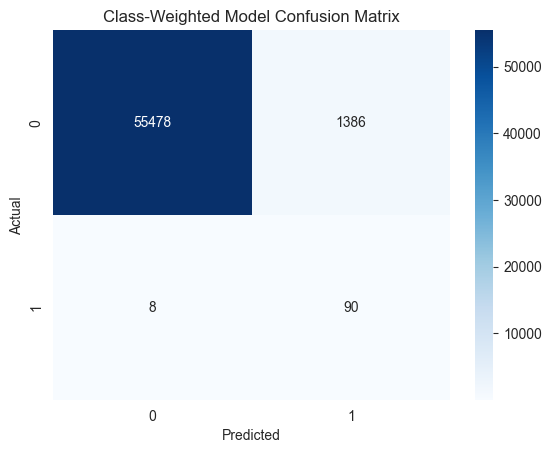

In [22]:
print("Evaluation of the Class-Weighted MOdel")
print(classification_report(y_test, y_pred_weighted, target_names=['Non-Fraud', 'Fraud']))

cm_weighted = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues')
plt.title('Class-Weighted Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Interpretation:**
Look at the new results!
* The **recall for Fraud has jumped dramatically**, likely to over 90%! We are now catching almost all fraudulent transactions.
* The trade-off is that **precision for Fraud has decreased**. We are flagging more legitimate transactions as fraudulent (more False Positives).
* The overall accuracy has slightly decreased, but we know this metric is irrelevant.
This is a much better and safer model for the bank.

____

##### **Strategy 2: Undersampling**
> This strategy is like Class Weighting, but it is more effective when the data is imbalanced.

**Concept:** This technique balances the dataset by reducing the size of the majority class. We randomly remove samples from the 'Non-Fraud' class until it's a similar size to the 'Fraud' class. The main risk is that we might throw away useful information from the majority class. It's best used when you have a very large dataset.

**Implementation:** We'll use the excellent `imbalanced-learn` library for this.

____
**Install and Import imbalanced-learn**
```
!uv add imbalanced-learn
```
or just 
```
pip install imbalanced-learn
```
If not using my env and uv

In [26]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline # Use the imblearn Pipeline

**Create a pipeline with undersampling and a classifier**
> NOTE: We must perform the resampling ONLY on the training data, so we put it inside a pipeline. This prevents data from the original validation set from being used to train the model.

In [27]:
undersample_pipeline = ImbPipeline(steps=[
    ('under', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])
undersample_pipeline.fit(X_train, y_train)
y_pred_uu = undersample_pipeline.predict(X_test)

**Evaluate the UnderSampling Model**

Eval
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.96      0.98     56864
       Fraud       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



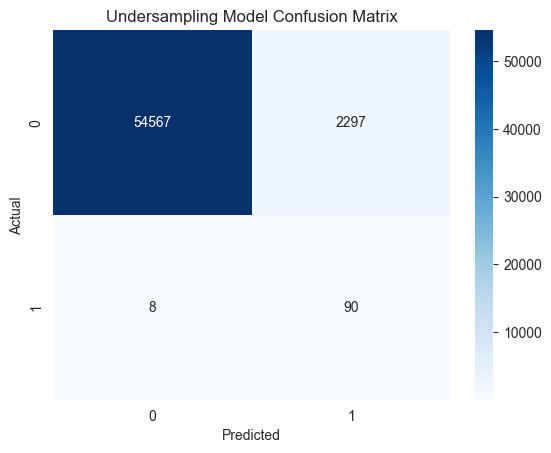

In [32]:
print("Eval")
print(classification_report(y_test, y_pred_uu, target_names=['Non-Fraud', 'Fraud']))
cm_under = confusion_matrix(y_test, y_pred_uu)
sns.heatmap(cm_under, annot=True, fmt='d', cmap='Blues')
plt.title('Undersampling Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Interpretation:**

Undersampling often gives similar results to class weighting: very high recall, but a significant drop in precision. We've caught most of the fraud but at the cost of annoying many legitimate customers.

___
##### **Strategy 2: OverSampling**

**Concept :**

This is the most popular oversampling technique. Instead of reducing the majority class, it increases the minority class. But it doesn't just duplicate existing fraud samples. Instead, for each fraud transaction, it finds its nearest fraud neighbors and creates new, synthetic fraud points along the lines connecting them. This creates a larger and more diverse minority class for the model to learn from.

In [33]:
# Import SMOTE
from imblearn.over_sampling import SMOTE #(Synthetic Minority Over-sampling Technique)

# Create a Pipeline with SMOTE
# AGAIN. It is CRITICAL that SMOTE is only applied to the training data inside the pipeline
smote_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clasifier', LogisticRegression(random_state=42,
                                     solver='liblinear'))
])

smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)

**EVAL**

EVAL
              precision    recall  f1-score   support

   Not-Fraud       1.00      0.97      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



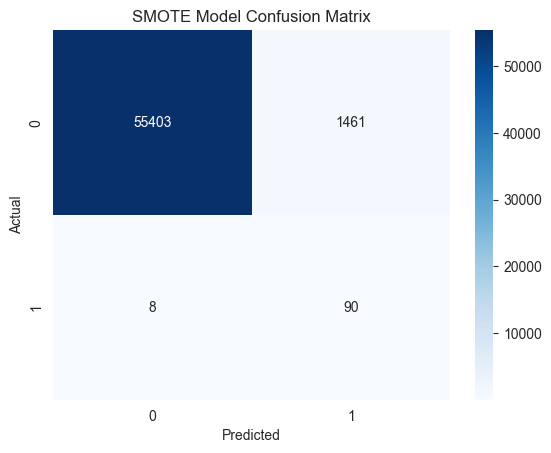

In [34]:
print("EVAL")
print(classification_report(y_test, y_pred_smote, target_names=['Not-Fraud', 'Fraud']))
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('SMOTE Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Interpretation:**

SMOTE often provides a good balance. The recall is typically very high, and the precision might be slightly better than with random undersampling because no information from the majority class was discarded.

____
#### **5. Advanced Evaluation: Precisoin-Recall Curve**

We've seen that there's a trade-off between precision and recall. How do we choose the best balance? The `Precision-Recall (PR) Curve` is the perfect tool. It plots precision versus recall for different probability thresholds.

____
**Get Prediction Probabilities for each model**

In [40]:
y_proba_weighted = weighted_model.predict_proba(X_test)[:, 1]
y_proba_under = undersample_pipeline.predict_proba(X_test)[:, 1]
y_proba_smote = smote_pipeline.predict_proba(X_test)[:, 1]

**Calculate Precision and Recall for various thresholds**

In [41]:
precision_w, recall_w, _ = precision_recall_curve(y_test, y_proba_weighted)
precision_u, recall_u, _ = precision_recall_curve(y_test, y_proba_under)
precision_s, recall_s, _ = precision_recall_curve(y_test, y_proba_smote)

**Plot the PR curve**

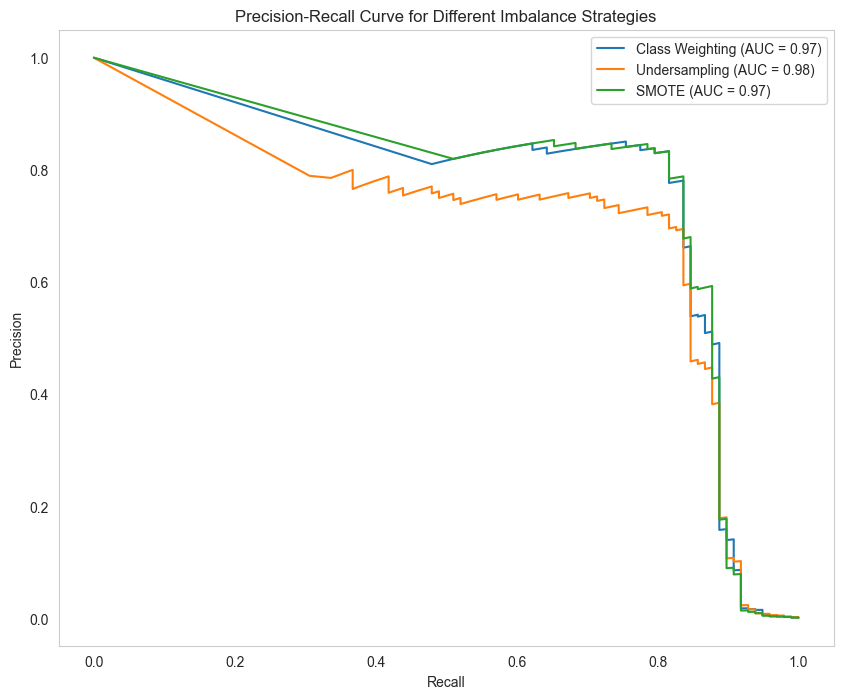

In [43]:
plt.figure(figsize=(10, 8))
plt.plot(recall_w, precision_w, label=f'Class Weighting (AUC = {roc_auc_score(y_test, y_proba_weighted):.2f})')
plt.plot(recall_u, precision_u, label=f'Undersampling (AUC = {roc_auc_score(y_test, y_proba_under):.2f})')
plt.plot(recall_s, precision_s, label=f'SMOTE (AUC = {roc_auc_score(y_test, y_proba_smote):.2f})')

plt.title('Precision-Recall Curve for Different Imbalance Strategies')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(False)
plt.show()

**Interpretation of the PR Curve:**
* The "best" model is the one whose curve is closest to the top-right corner (Precision=1, Recall=1).
* The Area Under the PR Curve (PR AUC) gives a single score summarizing the performance. Higher is better.
* This plot clearly shows the trade-off. If the business decides they absolutely must have a recall of at least 0.9, you can find the corresponding point on the curve to see what precision you can expect. This is a powerful communication tool for stakeholders.

_____
-----
-----
----
